In [3]:
df = pd.read_csv("C:/Users/ASUS/Documents/PFDS Assignments/desdata.csv")

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df.head()

,G_sol,DeltaG_sol,volume,sol_dip,O_charges,C_charges,Most_neg,Most_pos,Het_charges,MW,SASA,Lsolu_Hsolv,Lsolv_Hsolu,LogS
0,-27386.0295,108.4003,306.958,2.516480,0.00000,1.26830,-0.49662,0.40835,-1.94254,241.3536,504.517883,12.113,15.231,-4.10
1,-21701.1004,1192.0051,162.730,4.523210,-1.77497,1.26482,-0.43309,0.50939,-1.96130,173.0848,310.521484,10.758,17.200,-2.28
2,-27724.2400,-526.5967,308.963,5.968560,-0.77653,0.42313,-0.42737,0.37020,-1.54739,286.7171,483.724426,11.343,14.972,-3.95
3,-19847.0280,72.8581,160.798,0.030508,0.00000,0.00608,-0.12934,0.04961,0.00000,100.2034,307.255127,15.604,17.101,-4.23
4,-22909.2380,13.9833,225.266,0.006628,0.00000,-0.26705,-0.13063,0.06129,0.00000,140.2680,428.498199,13.418,15.521,-5.51


In [7]:
y = df.LogS
y.head()

0   -4.10
1   -2.28
2   -3.95
3   -4.23
4   -5.51
Name: LogS, dtype: float64

In [8]:
x = df.drop('LogS',axis=1)
x.head()

,G_sol,DeltaG_sol,volume,sol_dip,O_charges,C_charges,Most_neg,Most_pos,Het_charges,MW,SASA,Lsolu_Hsolv,Lsolv_Hsolu
0,-27386.0295,108.4003,306.958,2.516480,0.00000,1.26830,-0.49662,0.40835,-1.94254,241.3536,504.517883,12.113,15.231
1,-21701.1004,1192.0051,162.730,4.523210,-1.77497,1.26482,-0.43309,0.50939,-1.96130,173.0848,310.521484,10.758,17.200
2,-27724.2400,-526.5967,308.963,5.968560,-0.77653,0.42313,-0.42737,0.37020,-1.54739,286.7171,483.724426,11.343,14.972
3,-19847.0280,72.8581,160.798,0.030508,0.00000,0.00608,-0.12934,0.04961,0.00000,100.2034,307.255127,15.604,17.101
4,-22909.2380,13.9833,225.266,0.006628,0.00000,-0.26705,-0.13063,0.06129,0.00000,140.2680,428.498199,13.418,15.521


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [10]:
print("shape of original dataset :", df.shape)
print("shape of input - x_train", x_train.shape)
print("shape of output - y_train", y_train.shape)
print("shape of input - x_test", x_test.shape)
print("shape of output - y_test", y_test.shape)

shape of original dataset : (900, 14)
shape of input - x_train (630, 13)
shape of output - y_train (630,)
shape of input - x_test (270, 13)
shape of output - y_test (270,)


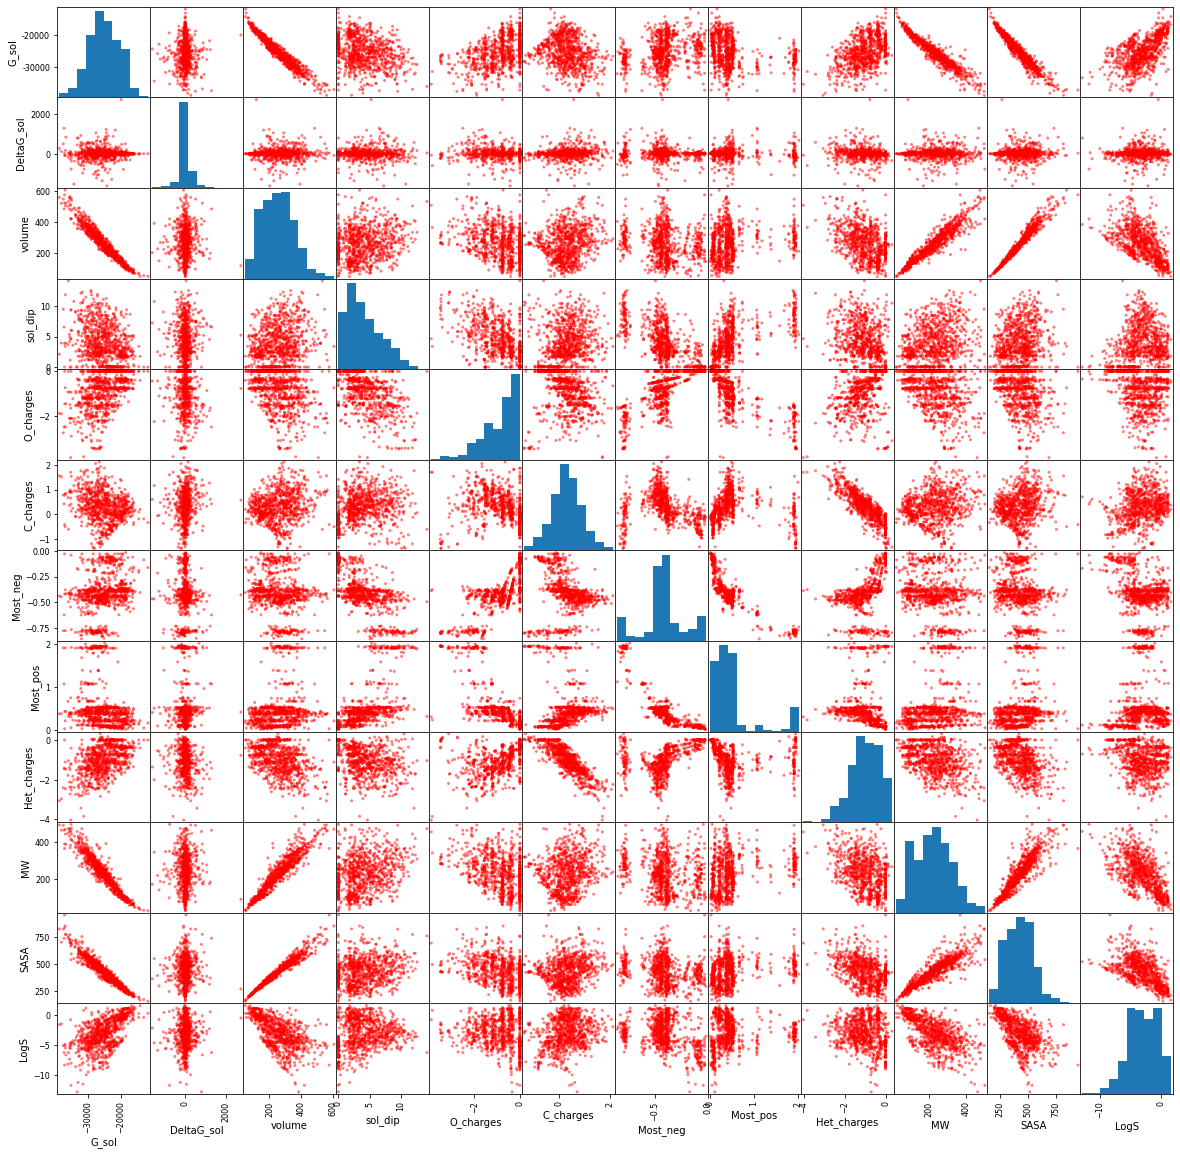

In [11]:
pd.plotting.scatter_matrix(df[["G_sol","DeltaG_sol","volume","sol_dip","O_charges","C_charges","Most_neg","Most_pos","Het_charges","MW","SASA","LogS"]],figsize=(20,20),color = "red");

In [12]:
correlated_values = df.drop("LogS", axis=1).apply(lambda J: J.corr(df.LogS))
sorted_correlated_values = correlated_values.sort_values(ascending=False,key=abs)
display(pd.DataFrame(sorted_correlated_values))

,0
MW,-0.632704
volume,-0.602517
G_sol,0.589807
SASA,-0.579014
Most_neg,-0.335865
Lsolu_Hsolv,0.326265
Lsolv_Hsolu,0.322686
C_charges,0.221957
Het_charges,-0.164787
O_charges,-0.142048


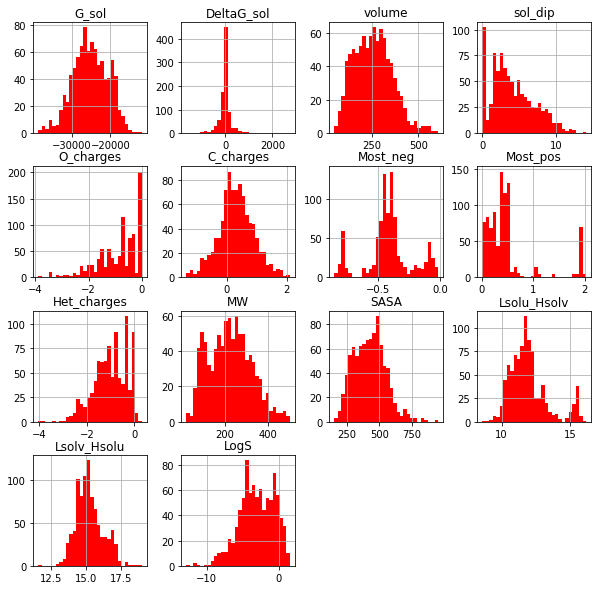

In [13]:
df.hist(bins=30,figsize=(10,10),color='red');

In [14]:
from sklearn.linear_model import LinearRegression

lin_regression = LinearRegression()
lin_regression.fit(x_train, y_train)

LinearRegression()

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

#Using a test data set and linear regression to forecast the values for the target variable
linear_tr_predictions = lin_regression.predict(x_test)

#Calculating the RMSE, MSE, MAE and R-squared values for the model created

linear_MSE = mean_squared_error(y_test, linear_tr_predictions)
linear_RMSE = np.sqrt(linear_MSE)
linear_R2 = r2_score(y_test, linear_tr_predictions)
linear_MAE = mean_absolute_error(y_test, linear_tr_predictions)

#Printing the metrics
LinearMatrix = {'Metric':['RMSE Scores','R2 Scores','MAE'], 'Value':[linear_RMSE,linear_R2,linear_MAE]}
LinearMatrixdf = pd.DataFrame(LinearMatrix)
LinearMatrixdf

,Metric,Value
0,RMSE Scores,1.065128
1,R2 Scores,0.821184
2,MAE,0.819641


In [16]:
#Performing Cross validation by using MSE,MAE and R-squared to evaluate the model
from sklearn.model_selection import cross_val_score

#Choosing the measures for evaluation
metrics = ["neg_mean_squared_error","neg_mean_absolute_error","r2"]

for i in range(len(metrics)):
    result = cross_val_score(lin_regression, x_train, y_train, scoring=metrics[i], cv = 10)
    print("Mean of ", metrics[i], "is :" ,abs(result.mean()))
    print("Root of ", metrics[i], "is :" ,np.sqrt(abs(result.mean())))
    print("Std Deviation of ", metrics[i], "is :" ,result.std())

Mean of  neg_mean_squared_error is : 1.439284979578264
Root of  neg_mean_squared_error is : 1.1997020378320045
Std Deviation of  neg_mean_squared_error is : 0.19453199693193074
Mean of  neg_mean_absolute_error is : 0.9184696095670397
Root of  neg_mean_absolute_error is : 0.958368201458625
Std Deviation of  neg_mean_absolute_error is : 0.07358608802218625
Mean of  r2 is : 0.7378761256831813
Root of  r2 is : 0.8589971627911126
Std Deviation of  r2 is : 0.06798048637305365


Lasso

In [17]:
#Importing the libraries required for perfroming Lasso Regression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RepeatedKFold
from sklearn.linear_model import Lasso

#The anticipated performance of a machine learning model can be enhanced by utilising repeated k-fold cross-validation.
#Just use the cross-validation procedure many times and average the results over all folds and runs.
#In this scenario, we're dividing the data into ten folds and repeating the operation three times, each time with a random state=1.
folds = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2)

#We construct a search space of possible values for Grid Search, within which the hyperparameter will be chosen based on its 
#effective error minimization. To determine the appropriate regularisation weights, or alpha, we will first generate 1000 
#random numbers in the range of 0.01 to 10 using linspace.
learning_rate = np.linspace(start = 0.001, stop=0.01, num=500)
grid_search = {'alpha': learning_rate}

#Specifying the model
lasso_model=Lasso()

#Now we'll run Grid Search on the hyperparameters, with the metric criterion set to a negative RMSE value.
#The RMSE is the most generally used assessment measure, and it shows us how well a regression model can predict the value of a 
#response variable in absolute terms.
grid_search_L = GridSearchCV(lasso_model, grid_search, cv=folds,scoring='neg_root_mean_squared_error',
                             return_train_score=True,verbose=1)

#do a training data search
Lasso_search = grid_search_L.fit(x_train, y_train)

Fitting 50 folds for each of 500 candidates, totalling 25000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 25000 out of 25000 | elapsed:  4.6min finished


In [18]:
#Let's summarise the model by showing the highest alpha value and highest score.
BestMatrix1 = {'Best Value':['Alpha','Model'], 'Value':[Lasso_search.best_estimator_.alpha,-Lasso_search.best_score_]}
BestMatrixdf1 = pd.DataFrame(BestMatrix1)
BestMatrixdf1

,Best Value,Value
0,Alpha,0.001000
1,Model,1.190145


In [19]:
#We now have our best hyperparameter value. We will now develop our Lasso Regression model, using the regularisation 
#weight-alpha,obtained from the Grid Search performed above
lasso_regression = Lasso(alpha=grid_search_L.best_params_['alpha'])
lasso_regression.fit(x_train, y_train)

# Using the established lasso model to predict the value of the target variable
y_Lasso_Prediction = lasso_regression.predict(x_test)

#Calculating the RMSE, MSE, MAE and R-squared values for the Lasso Regression
lasso_MSE=mean_squared_error(y_test, y_Lasso_Prediction)
lasso_RMSE=np.sqrt(lasso_MSE)
lasso_MAE = mean_absolute_error(y_test, y_Lasso_Prediction)
lasso_R2 = r2_score(y_test, y_Lasso_Prediction)

#Printing the metrics
LassoMatrix = {'Metric':['RMSE Scores','R2 Scores','MAE'], 'Value':[lasso_RMSE,lasso_R2,lasso_MAE]}
LassoMatrixdf = pd.DataFrame(LassoMatrix)
LassoMatrixdf

,Metric,Value
0,RMSE Scores,1.065847
1,R2 Scores,0.820942
2,MAE,0.819678


In [20]:
#Performing Cross validation by using MSE,MAE and R-squared to evaluate the model

#Choosing the measures for evaluation
metrics = ["neg_mean_squared_error","neg_mean_absolute_error","r2"]

for i in range(len(metrics)):
    result = cross_val_score(lasso_regression, x_train, y_train, scoring=metrics[i], cv = 10)
    print("Mean of ", metrics[i], "is :" ,abs(result.mean()))
    print("Root of ", metrics[i], "is :" ,np.sqrt(abs(result.mean())))
    print("Std Deviation of ", metrics[i], "is :" ,result.std())

Mean of  neg_mean_squared_error is : 1.4394759821351761
Root of  neg_mean_squared_error is : 1.199781639355752
Std Deviation of  neg_mean_squared_error is : 0.1978514530444312
Mean of  neg_mean_absolute_error is : 0.9183808560417415
Root of  neg_mean_absolute_error is : 0.9583218958375841
Std Deviation of  neg_mean_absolute_error is : 0.0750248617004769
Mean of  r2 is : 0.7380011494473339
Root of  r2 is : 0.8590699328036885
Std Deviation of  r2 is : 0.06754479821756838


Ridge Regression

In [21]:
#Importing the libraries required for perfroming Ridge Regression
from sklearn.linear_model import Ridge

#Using repeated k-fold cross-validation, a machine learning model's projected performance may be improved.
#Just use the cross-validation procedure many times and average the results over all folds and runs.
#In this scenario, we're dividing the data into ten folds and repeating the operation three times, each time with a random state=1.
folds = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

#We establish a search space of viable values for Grid Search, within which the hyperparameter will be chosen based on its 
#effective error reduction. To determine the appropriate regularisation weights, or alpha, we will first generate 
#random integers in the range of 1 to 50 using linspace.
learning_rate = np.linspace(start=0, stop=60, num=80)
grid_search = {'alpha': learning_rate}

#Defining the model
Ridge_model = Ridge()

#Now we'll run Grid Search on the hyperparameters, with the metric criterion set to a negative RMSE value.
#The RMSE is the most generally used assessment measure, and it shows us how well a regression model can predict the value of
#a response variable in absolute terms.
grid_search_R = GridSearchCV(Ridge_model, grid_search, cv=folds,scoring='neg_root_mean_squared_error',
                             return_train_score=True,verbose=1)
Ridge_result = grid_search_R.fit(x_train, y_train)


Fitting 60 folds for each of 80 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed:   33.0s finished


In [22]:
BestMatrix = {'Best Value':['Alpha','Model'], 'Value':[Ridge_result.best_params_,Ridge_result.best_score_]}
BestMatrixdf = pd.DataFrame(BestMatrix)
BestMatrixdf

,Best Value,Value
0,Alpha,{'alpha': 0.0}
1,Model,-1.194665


In [23]:
#We've arrived at our optimal hyperparameter value. We'll now use the regularisation weight-alpha acquired from the Grid Search 
#to create our Lasso Regression model.
ridge_regression = Ridge(alpha=grid_search_R.best_params_['alpha'])
ridge_regression.fit(x_train, y_train)

# Using the created ridge model to predict the value of the target variable
y_ridge_prediction = ridge_regression.predict(x_test)

#Calculating the RMSE, MSE, MAE and R-squared values for the Ridge Regression
ridge_MSE = mean_squared_error(y_test, y_ridge_prediction)
ridge_RMSE=np.sqrt(ridge_MSE)
ridge_MAE = mean_absolute_error(y_test, y_ridge_prediction)
ridge_R2 = r2_score(y_test, y_ridge_prediction)

RidgeMatrix = {'Metric':['RMSE Scores','R2 Scores','MAE'], 'Value':[ridge_RMSE,ridge_R2,ridge_MAE]}
RidgeMatrixdf = pd.DataFrame(RidgeMatrix)
RidgeMatrixdf

,Metric,Value
0,RMSE Scores,1.065128
1,R2 Scores,0.821184
2,MAE,0.819641


#### Model Performance

In [37]:
evaluated_complex_matrix = {'Regression Model':['OLS','Lasso','Ridge','Random Forest'], 'RMSE Scores':[linear_RMSE,lasso_RMSE,ridge_RMSE,round(np.sqrt(mean_squared_error(y_test, forest_prediction)),4)],
                     'R2 Scores':[linear_R2,lasso_R2,ridge_R2,round(r2_score(y_test, forest_prediction),4)]}
matrix_dframe = pd.DataFrame(evaluated_complex_matrix)
matrix_dframe.sort_values(by = "RMSE Scores")

,Regression Model,RMSE Scores,R2 Scores
3,Random Forest,0.928500,0.864100
0,OLS,1.065128,0.821184
2,Ridge,1.065128,0.821184
1,Lasso,1.065847,0.820942


In [25]:
#Using the created ridge model to predict the value of the target variable
lasso_model = Lasso(alpha=grid_search_L.best_params_['alpha'], fit_intercept = True, random_state = 800, max_iter=4000)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.001, max_iter=4000, random_state=800)

In [26]:
#To find the important features, we must first obtain the values of the Lasso regression coefficients.
#We'll record the absolute values and then arrange them in decreasing order of importance since the importance of a 
#characteristic is the absolute value of its coefficient.
lasso_coeff_values = abs(lasso_model.coef_)
lasso_features1 = sorted(zip(lasso_coeff_values, df.drop("LogS", axis=1).columns), reverse=True)
lasso_feature_list_values = pd.DataFrame(lasso_features1,
                  columns = ['Lasso Imp Features', 'Attributes'])
lasso_feature_list_values

,Lasso Imp Features,Attributes
0,7.491004,Most_neg
1,1.879684,Most_pos
2,1.242747,Het_charges
3,0.700605,O_charges
4,0.453969,C_charges
5,0.158592,Lsolv_Hsolu
6,0.065503,Lsolu_Hsolv
7,0.033398,sol_dip
8,0.009635,MW
9,0.009152,volume


Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.exceptions import FitFailedWarning
from sklearn.exceptions import FitFailedWarning

forest_regression=RandomForestRegressor()

grid_search  = [{'n_estimators': [5, 12, 40, 70, 120],'max_features':[2, 5, 6, 9]}, 
               {'bootstrap': [False],'n_estimators':[2,7, 12],'max_features':[1,4,8]}]

grid_search_forest = GridSearchCV(forest_regression, grid_search, cv=10,scoring='neg_mean_squared_error')
    

In [28]:
grid_search_forest.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 5, 6, 9],
                          'n_estimators': [5, 12, 40, 70, 120]},
                         {'bootstrap': [False], 'max_features': [1, 4, 8],
                          'n_estimators': [2, 7, 12]}],
             scoring='neg_mean_squared_error')

In [29]:
grid_search_forest.best_estimator_

RandomForestRegressor(max_features=9, n_estimators=120)

In [30]:
forest_features_count = grid_search_forest.best_params_['max_features']
forest_estimator_count = grid_search_forest.best_params_['n_estimators']

print("Optimum number of max features:",forest_features_count)
print("Optimum number of estimators:",forest_estimator_count)

Optimum number of max features: 9
Optimum number of estimators: 120


In [31]:
forest_regression_model = RandomForestRegressor(max_features = forest_features_count, n_estimators = forest_estimator_count, 
                                               random_state=130)
forest_regression_model.fit(x_train, y_train)

forest_prediction = forest_regression_model.predict(x_test)

ForestMatrix = {'Metric':['RMSE Scores','R2 Scores','MAE'], 'Value':[round(np.sqrt(mean_squared_error(y_test, forest_prediction)),4),round(mean_absolute_error(y_test, forest_prediction),4),round(r2_score(y_test, forest_prediction),4)]}
ForestMatrixdf = pd.DataFrame(ForestMatrix)
ForestMatrixdf

,Metric,Value
0,RMSE Scores,0.9285
1,R2 Scores,0.6836
2,MAE,0.8641


In [32]:
comparisonMatrix = {'Regression Model':['Lasso','Random Forest'], 'RMSE Scores':[lasso_RMSE,round(np.sqrt(mean_squared_error(y_test, forest_prediction)),4)],
                     'R2 Scores':[lasso_R2,round(r2_score(y_test, forest_prediction),4)]}

comparisonDataFrame = pd.DataFrame(comparisonMatrix)
comparisonDataFrame.sort_values(by = "RMSE Scores")

,Regression Model,RMSE Scores,R2 Scores
1,Random Forest,0.928500,0.864100
0,Lasso,1.065847,0.820942


#### Identifying Relevant Features

In [33]:
forest_imp_features = grid_search_forest.best_estimator_.feature_importances_
att = list(df.drop("LogS", axis=1))

forest_features1 = sorted(zip(forest_imp_features,att),reverse=True)
forest_features2 = pd.DataFrame(forest_features1,
                  columns = ['Forest Imp Features', 'Attributes'])
forest_features2[:5]

,Forest Imp Features,Attributes
0,0.249184,volume
1,0.161334,Most_neg
2,0.137060,SASA
3,0.103384,MW
4,0.081468,Most_pos


In [34]:
# Comparing Lasso and Random Forest models
outer_join_df=pd.merge(forest_features2[:5], lasso_feature_list_values[:5], on='Attributes', how='outer')
outer_join_df

,Forest Imp Features,Attributes,Lasso Imp Features
0,0.249184,volume,NaN
1,0.161334,Most_neg,7.491004
2,0.137060,SASA,NaN
3,0.103384,MW,NaN
4,0.081468,Most_pos,1.879684
5,NaN,Het_charges,1.242747
6,NaN,O_charges,0.700605
7,NaN,C_charges,0.453969
